In [1]:
#question1 till c first part
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import os
import urllib.request

# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
filename = "winequality-red.csv"
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

# Read the dataset
df1 = pd.read_csv(filename)

# Preprocessing: Splitting the single column into multiple columns
df1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
     'alcohol', 'quality']] = df1['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";", expand=True)

# Dropping the original column
df1.drop('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"', axis=1, inplace=True)

# Define features and target
x1 = df1.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
y1 = df1.iloc[:,11]

# Splitting the dataset into train, validation, and test sets
x1_train_val, x1_test, y1_train_val, y1_test = train_test_split(x1, y1, test_size=0.333, random_state=0)
x1_train, x1_val, y1_train, y1_val = train_test_split(x1_train_val, y1_train_val, test_size=0.5, random_state=0)

# Feature Scaling
scaler1 = StandardScaler()
x1_train = scaler1.fit_transform(x1_train)
x1_test = scaler1.transform(x1_test)
x1_val = scaler1.transform(x1_val)

# Hyperparameter Tuning
accuracies = []
feature_importances = []
x = np.arange(10, 510, 50)
for i in x:
    classifier1 = RandomForestClassifier(n_estimators=i, criterion="entropy")
    classifier1.fit(x1_train, y1_train)
    y1_val_pred = classifier1.predict(x1_val)
    accuracy = accuracy_score(y1_val, y1_val_pred)
    accuracies.append(accuracy)

    feature_importances.append(classifier1.feature_importances_)

best_estimator = x[np.argmax(accuracies)]
print("Best Number of Estimators:", best_estimator)

# Plotting Validation Accuracy vs Number of Estimators
plt.plot(x, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Number of Estimators')
plt.grid(True)
plt.show()

# Training the Random Forest Classifier with the best estimator
classifier1 = RandomForestClassifier(n_estimators=best_estimator, criterion="entropy")
classifier1.fit(x1_train, y1_train)

# Predictions on test set
y1_pred = classifier1.predict(x1_test)

# Evaluating the model
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)
print("Best Number of Estimators:", best_estimator)

feature_importances_mean = np.mean(feature_importances, axis=0)
feature_names = x1.columns
sorted_indices = np.argsort(feature_importances_mean)[::-1]  # Sort indices in descending order

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importances_mean[sorted_indices])
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [ ]:
#random forest white wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import os
import urllib.request

# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
filename = "winequality-white.csv"
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

# Read the dataset
df2 = pd.read_csv(filename)

# Preprocessing: Splitting the single column into multiple columns
df2[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
     'alcohol', 'quality']] = df2['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";", expand=True)

# Dropping the original column
df2.drop('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"', axis=1, inplace=True)

# Define features and target
x2 = df2.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
y2 = df2.iloc[:,11]

# Splitting the dataset into train, validation, and test sets
x2_train_val, x2_test, y2_train_val, y2_test = train_test_split(x2, y2, test_size=0.333, random_state=0)
x2_train, x2_val, y2_train, y2_val = train_test_split(x2_train_val, y2_train_val, test_size=0.5, random_state=0)

# Feature Scaling
scaler = StandardScaler()
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)
x2_val = scaler.transform(x2_val)

# Hyperparameter Tuning
accuracies = []
feature_importances = []
y = np.arange(10, 510, 50)
for i in y:
    classifier = RandomForestClassifier(n_estimators=i, criterion="entropy")
    classifier.fit(x2_train, y2_train)
    y2_val_pred = classifier.predict(x2_val)
    accuracy = accuracy_score(y2_val, y2_val_pred)
    accuracies.append(accuracy)

    feature_importances.append(classifier.feature_importances_)

best_estimator = y[np.argmax(accuracies)]
print("Best Number of Estimators:", best_estimator)

# Plotting Validation Accuracy vs Number of Estimators
plt.plot(y, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Number of Estimators')
plt.grid(True)
plt.show()

# Training the Random Forest Classifier with the best estimator
classifier = RandomForestClassifier(n_estimators=best_estimator, criterion="entropy")
classifier.fit(x2_train, y2_train)

# Predictions on test set
y2_pred = classifier.predict(x2_test)

# Evaluating the model
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)
print("Best Number of Estimators:", best_estimator)

# Feature Importance
feature_importances_mean = np.mean(feature_importances, axis=0)
feature_names = x2.columns
sorted_indices = np.argsort(feature_importances_mean)[::-1]  # Sort indices in descending order

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importances_mean[sorted_indices])
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [ ]:
# 1 c neural network
import tensorflow as tf
import numpy as np
import shap

# Define your neural network architecture
features = x1.shape[1]
batch_size = 32
learning_rate = 0.01

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(features,)),
    tf.keras.layers.Dense(1, activation='linear')])  # Linear activation in the output layer

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='mean_squared_error')

y1_val = np.array([float(element) for element in y1_val], dtype=float)
y1_train = np.array([float(element) for element in y1_train], dtype=float)
y1_test = np.array([float(element) for element in y1_test], dtype=float)
x1_train = np.array(x1_train)
x1_test = np.array(x1_test)
x1_val = np.array(x1_val)

model.fit(x1_train, y1_train, epochs=10, batch_size=batch_size, validation_data=(x1_val, y1_val))

# Create a KernelExplainer object
explainer = shap.KernelExplainer(model.predict, x1_train)

# Evaluate the model
initial_val_loss = model.evaluate(x1_val, y1_val)

for i in range(9):
    batch_size *= 2
    learning_rate /= 10
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_squared_error')
    model.fit(x1_train, y1_train, epochs=10, batch_size=batch_size, validation_data=(x1_val, y1_val))

    val_loss = model.evaluate(x1_val, y1_val)
    loss = model.evaluate(x1_test, y1_test)
    print("Test Loss:", loss)

    if val_loss < initial_val_loss:
        initial_val_loss = val_loss
    else:
        break

print("final validation loss after looping:",val_loss)

# Calculate SHAP values
shap_values = explainer.shap_values(x1_train, nsamples=100)

# Plot SHAP values for a specific instance (e.g., the first instance)
shap.summary_plot(shap_values, x1_train)





In [ ]:
#1e

y1_pred = classifier.predict(x1_test)

accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy of redwine model on redwine data:", accuracy)

y2_pred = classifier.predict(x2_test)

accuracy = accuracy_score(y2_test,y2_pred)
print("accuracy of whitewine model on white wine data:",accuracy)

y1_pred = classifier.predict(x2_test[:533])

accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy of red wine model on white wine data:", accuracy)

y2_pred = classifier.predict(x1_test)

accuracy = accuracy_score(y2_test[:533],y2_pred)
print("accuracy of white wine model on red wine data:",accuracy)


#cannot be used as the accuracies drop significantly now it is less than 50 percent

In [ ]:
#question 2 a b c i)
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import os
import urllib.request
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Download the ZIP file containing the dataset
url = "https://archive.ics.uci.edu/static/public/342/mice+protein+expression.zip"
filename = "mice_protein_expression.zip"
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

# Extract the contents of the ZIP file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall("mice_protein_expression")

# Read the dataset into a DataFrame
df3 = pd.read_excel("mice_protein_expression/Data_Cortex_Nuclear.xls")


a = df3.iloc[:, 1:-4]

# ------------------ NAN values replaced -----------------
# Fit the imputer on your DataFrame
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(a)

# Impute missing values in your DataFrame
a_imputed = imp.transform(a)  # x is df with all nan values replaced
# # till here ------------ output x ------------------------------

column_names_a = df3.iloc[:, 1:-4].columns

# Create a DataFrame from the imputed data 'a' with the original column names
a_bar = pd.DataFrame(a_imputed, columns=column_names_a)
# print(a_bar)

b = df3.iloc[:, -3:]  # preprocessing needed as it is words
b = pd.get_dummies(b)

# Concatenate 'a' and 'b' along axis 1
x = pd.concat([a_bar, b], axis=1)
y = df3.iloc[:,-4]
# print(x.shape)
# print(x)
# print(y.shape)
y = pd.get_dummies(y)
# print(y)

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.333, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.5, random_state=0)

# print(y_test.shape,y_val.shape,y_train.shape)

# Feature Scaling
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)
x_val = st_x.transform(x_val)

# Fitting Random Forest classifier to the training set
accuracies = []
feature_importances = []

n_estimators_range = np.arange(10, 510, 50)
for n_estimators in n_estimators_range:
    classifier = RandomForestClassifier(n_estimators=n_estimators, criterion="entropy")
    classifier.fit(x_train, y_train)

    # Calculate validation accuracy
    accuracy = classifier.score(x_val, y_val)
    accuracies.append(accuracy)

    # Calculate feature importances
    feature_importances.append(classifier.feature_importances_)

# Plotting validation accuracy vs number of estimators
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Number of Estimators')
plt.grid(True)
plt.show()

# Selecting the best estimator based on highest validation accuracy
best_n_estimators = n_estimators_range[np.argmax(accuracies)]
print("Best Number of Estimators:", best_n_estimators)

# Fitting the model with the best estimator
best_classifier = RandomForestClassifier(n_estimators=best_n_estimators, criterion="entropy")
best_classifier.fit(x_train, y_train)

# Get predictions on the test set
y_pred = best_classifier.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

In [ ]:
#question 2 c ii)
import tensorflow as tf
import shap

features = x.shape[1]

batch_size = 32
learning_rate = 0.01

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(features,)),
    tf.keras.layers.Dense(1, activation='softmax')])  # Linear activation in the output layer

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='mean_squared_error')


x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)
# print(y_val)

model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val))


# Evaluate initial model on validation data
initial_val_loss = model.evaluate(x_val, y_val)

for i in range(3):
  batch_size *=2
  learning_rate /= 10
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='mean_squared_error')
  model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val))

  val_loss = model.evaluate(x_val,y_val)
  loss = model.evaluate(x_test, y_test)
  print("Test Loss:", loss)

  if (val_loss < initial_val_loss):
    initial_val_loss = val_loss
  else:
      break

In [ ]:
#run this block of cell and restart the run time before running the next block
%pip uninstall scikit-learn
%pip install scikit-learn==1.1.3

In [ ]:
#question 2d
import numpy as np
import pandas as pd
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Download the ZIP file containing the dataset
url = "https://archive.ics.uci.edu/static/public/342/mice+protein+expression.zip"
filename = "mice_protein_expression.zip"
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)

# Extract the contents of the ZIP file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall("mice_protein_expression")

# Read the dataset into a DataFrame
df3 = pd.read_excel("mice_protein_expression/Data_Cortex_Nuclear.xls")

a = df3.iloc[:, 1:-4]

# ------------------ NAN values replaced -----------------
# Fit the imputer on your DataFrame
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(a)

# Impute missing values in your DataFrame
a_imputed = imp.transform(a)

column_names_a = df3.iloc[:, 1:-4].columns

# Create a DataFrame from the imputed data 'a' with the original column names
a_bar = pd.DataFrame(a_imputed, columns=column_names_a)

b = df3.iloc[:, -3:]  # preprocessing needed as it is words
b = pd.get_dummies(b)

# Concatenate 'a' and 'b' along axis 1
x = pd.concat([a_bar, b], axis=1)
y = df3.iloc[:, -4]

# Convert target variable to one-hot encoding
y = pd.get_dummies(y)

# Split data into train and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.333, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.5, random_state=0)

# Feature Scaling
st_x = StandardScaler()
x_train_scaled = st_x.fit_transform(x_train)
x_test_scaled = st_x.transform(x_test)
x_val_scaled = st_x.transform(x_val)

# Fitting Random Forest classifier to the training set
accuracies = []
feature_importances = []

n_estimators_range = np.arange(10, 510, 50)
for n_estimators in n_estimators_range:
    classifier = RandomForestClassifier(n_estimators=n_estimators, criterion="entropy")
    classifier.fit(x_train_scaled, y_train)

    # Calculate validation accuracy
    accuracy = classifier.score(x_val_scaled, y_val)
    accuracies.append(accuracy)

    # Calculate feature importances
    feature_importances.append(classifier.feature_importances_)

# Plotting validation accuracy vs number of estimators
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Number of Estimators')
plt.grid(True)
plt.show()

# Selecting the best estimator based on highest validation accuracy
best_n_estimators = n_estimators_range[np.argmax(accuracies)]
print("Best Number of Estimators:", best_n_estimators)

# Fitting the model with the best estimator
best_classifier = RandomForestClassifier(n_estimators=best_n_estimators, criterion="entropy")
best_classifier.fit(x_train_scaled, y_train)

# Get predictions on the test set
y_pred = best_classifier.predict(x_test_scaled)

# Perform Recursive Feature Elimination with Cross-Validation (RFECV)
estimator = RandomForestClassifier(n_estimators=100, criterion="entropy")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(x_train_scaled, y_train)

# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()

In [8]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '.'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


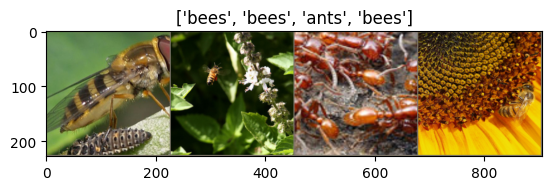

In [9]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [10]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [11]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [13]:
# model_ft = models.resnet18(weights='IMAGENET1K_V1')
# num_ftrs = model_ft.fc.in_features
# # Here the size of each output sample is set to 2.
# # Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
# model_ft.fc = nn.Linear(num_ftrs, 2)

# model_ft = model_ft.to(device)

# criterion = nn.CrossEntropyLoss()

# # Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\bveda/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


In [14]:
# model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
#                        num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5083 Acc: 0.7459
val Loss: 0.1390 Acc: 0.9412

Epoch 1/24
----------
train Loss: 0.6320 Acc: 0.7213
val Loss: 0.8035 Acc: 0.7059

Epoch 2/24
----------
train Loss: 0.4339 Acc: 0.8115
val Loss: 0.2548 Acc: 0.9020

Epoch 3/24
----------
train Loss: 0.5071 Acc: 0.7951
val Loss: 0.2681 Acc: 0.9085

Epoch 4/24
----------
train Loss: 0.5837 Acc: 0.7541
val Loss: 0.4917 Acc: 0.8431

Epoch 5/24
----------
train Loss: 0.6333 Acc: 0.8033
val Loss: 0.3962 Acc: 0.8889

Epoch 6/24
----------
train Loss: 0.6587 Acc: 0.7746
val Loss: 0.4112 Acc: 0.8497

Epoch 7/24
----------
train Loss: 0.3979 Acc: 0.8525
val Loss: 0.3072 Acc: 0.9085

Epoch 8/24
----------
train Loss: 0.3356 Acc: 0.8648
val Loss: 0.3256 Acc: 0.9216

Epoch 9/24
----------
train Loss: 0.4493 Acc: 0.8402
val Loss: 0.3042 Acc: 0.8889

Epoch 10/24
----------
train Loss: 0.3329 Acc: 0.8689
val Loss: 0.2828 Acc: 0.9020

Epoch 11/24
----------
train Loss: 0.2511 Acc: 0.8934
val Loss: 0.2583 Acc: 0.9150

Ep

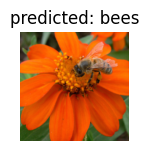

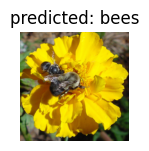

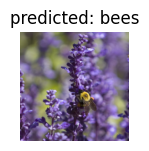

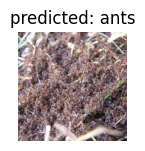

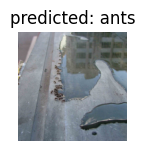

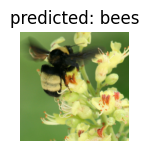

In [15]:
# visualize_model(model_ft)


In [16]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [17]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5641 Acc: 0.7090
val Loss: 0.3156 Acc: 0.8758

Epoch 1/24
----------
train Loss: 0.4078 Acc: 0.8033
val Loss: 0.2011 Acc: 0.9542

Epoch 2/24
----------
train Loss: 0.3624 Acc: 0.8320
val Loss: 0.3272 Acc: 0.8758

Epoch 3/24
----------
train Loss: 0.4735 Acc: 0.8115
val Loss: 0.2592 Acc: 0.9085

Epoch 4/24
----------
train Loss: 0.4929 Acc: 0.7910
val Loss: 0.2413 Acc: 0.9085

Epoch 5/24
----------
train Loss: 0.3013 Acc: 0.8811
val Loss: 0.1949 Acc: 0.9412

Epoch 6/24
----------
train Loss: 0.4896 Acc: 0.7992
val Loss: 0.1666 Acc: 0.9346

Epoch 7/24
----------
train Loss: 0.3490 Acc: 0.8525
val Loss: 0.2073 Acc: 0.9216

Epoch 8/24
----------
train Loss: 0.3986 Acc: 0.8197
val Loss: 0.1850 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.3449 Acc: 0.8320
val Loss: 0.1884 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3462 Acc: 0.8320
val Loss: 0.1759 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.4252 Acc: 0.8156
val Loss: 0.1742 Acc: 0.9412

Ep

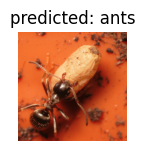

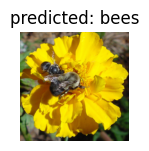

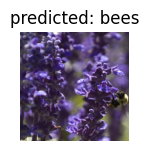

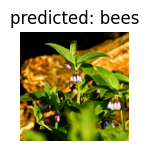

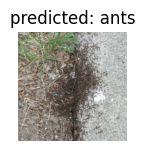

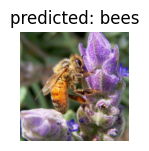

In [18]:
visualize_model(model_conv)

plt.ioff()
plt.show()

In [19]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)
        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

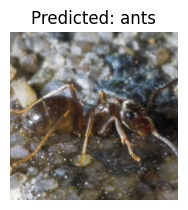

In [39]:
visualize_model_predictions(
    model_conv,
    img_path = r'D:\intro to ml\hymenoptera_data\hymenoptera_data\val\ants\153320619_2aeb5fa0ee.jpg'
)

plt.ioff()
plt.show()

In [60]:
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

def extract_resnet18_features(img_path):
    # Load pre-trained ResNet-18 model
    model = models.resnet18(pretrained=True)
    
    # Remove the fully connected layers (classifier)
    model = torch.nn.Sequential(*(list(model.children())[:-1]))
    
    # Set the model to evaluation mode
    model.eval()
    
    # Define data transformations
    data_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    # Load and transform the input image
    img = Image.open(img_path)
    img = data_transforms(img).unsqueeze(0)  # Add batch dimension
    
    # Extract features
    with torch.no_grad():
        features = model(img)
    
    return features.squeeze().numpy()  # Convert to numpy array and remove batch dimension

img_path = r'D:\intro to ml\hymenoptera_data\hymenoptera_data\val\ants\153320619_2aeb5fa0ee.jpg'
features = extract_resnet18_features(img_path)

print(features.shape)

(512,)


In [57]:
    # Define a function to extract features for a given input image
    # Define a function to extract features for a given input image
    def extract_features(model, img):
        # Set the model to evaluation mode
        model.eval()

        # Preprocess the input image
        data_transforms = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        img = data_transforms(img).unsqueeze(0)  # Add batch dimension

        # Move the image to the same device as the model
        img = img.to(next(model.parameters()).device)

        # Extract features
        with torch.no_grad():
            features = model.conv1(img)  # Extract features from the first convolutional layer
            features = model.bn1(features)
            features = model.relu(features)
            features = model.maxpool(features)

            features = model.layer1(features)
            features = model.layer2(features)
            features = model.layer3(features)
            features = model.layer4(features)

        # Remove the batch dimension and convert to numpy array
        features = features.squeeze().cpu().numpy()

        return features

    # Example usage:
    #img_path = r'D:\intro to ml\hymenoptera_data\hymenoptera_data\val\ants\153320619_2aeb5fa0ee.jpg'
    img = Image.open(r'D:\intro to ml\hymenoptera_data\hymenoptera_data\val\ants\153320619_2aeb5fa0ee.jpg')
    features = extract_features(model_conv, img)
    print(features.shape)  # Print the shape of the extracted features

(512, 7, 7)


In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import os

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '.'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Get features and labels
def get_features_labels(dataloader, model):
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for inputs, labels_batch in dataloader:
            inputs = inputs.to(device)
            features_batch = model(inputs).cpu().numpy()
            features.append(features_batch)
            labels.append(labels_batch.numpy())
    features = np.concatenate(features)
    labels = np.concatenate(labels)
    return features, labels

# Extract features using ResNet18
model_conv = torchvision.models.resnet18(pretrained=True)
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)
model_conv = model_conv.to(device)

features_train, labels_train = get_features_labels(dataloaders['train'], model_conv)
features_val, labels_val = get_features_labels(dataloaders['val'], model_conv)

# Step 5: Define grid search parameters
svm_param_grid = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1, 10]}

rf_param_grid = {'max_depth': [None, 10, 20, 30],
                 'n_estimators': [50, 100, 200]}

# Step 6: Perform grid search
svm_grid_search = GridSearchCV(SVC(kernel='rbf'), svm_param_grid, cv=5)
svm_grid_search.fit(features_train, labels_train)

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid_search.fit(features_train, labels_train)

# Step 7: Train the models with best parameters
best_svm_model = svm_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

# Step 8: Evaluate on test data
svm_test_preds = best_svm_model.predict(features_val)
rf_test_preds = best_rf_model.predict(features_val)

svm_accuracy = accuracy_score(labels_val, svm_test_preds)
svm_f1 = f1_score(labels_val, svm_test_preds, average='weighted')

rf_accuracy = accuracy_score(labels_val, rf_test_preds)
rf_f1 = f1_score(labels_val, rf_test_preds, average='weighted')

# Step 9: Compare results
print("SVM - Accuracy:", svm_accuracy, "F1 Score:", svm_f1)
print("Random Forest - Accuracy:", rf_accuracy, "F1 Score:", rf_f1)


C:\Users\bveda\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\bveda\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SVM - Accuracy: 0.6405228758169934 F1 Score: 0.6379359339937875
Random Forest - Accuracy: 0.6209150326797386 F1 Score: 0.620688307220815


In [1]:
import numpy as np
import streamlit as st
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import os

# Preprocessing: Read data, split into features and target
df1 = pd.read_csv('winequality-red.csv')
df1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
     'alcohol', 'quality']] = df1['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].str.split(";", expand=True)

df1.drop('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"', axis=1, inplace=True)

x1 = df1.iloc[:, [1,2, 3, 4, 5, 6, 7, 8, 9, 10]]
y1 = df1.iloc[:, 11]

# Split data into train, validation, and test sets
x1_train_val, x1_test, y1_train_val, y1_test = train_test_split(x1, y1, test_size=0.333, random_state=0)
x1_train, x1_val, y1_train, y1_val = train_test_split(x1_train_val, y1_train_val, test_size=0.5, random_state=0)

# Feature Scaling
st_x1 = StandardScaler()
x1_train = st_x1.fit_transform(x1_train)
x1_test = st_x1.transform(x1_test)
x1_val = st_x1.transform(x1_val)

# Fitting Random Forest classifier to the training set
accuracies = []
feature_importances = []

x = np.arange(10, 510, 50)
for i in x:
    classifier = RandomForestClassifier(n_estimators=i, criterion="entropy")
    classifier.fit(x1_train, y1_train)

    # Calculate validation accuracy
    accuracy = classifier.score(x1_val, y1_val)
    accuracies.append(accuracy)

    # Calculate feature importances
    feature_importances.append(classifier.feature_importances_)



# Selecting the best estimator based on highest validation accuracy
best_estimator = x[np.argmax(accuracies)]
print("Best Number of Estimators:", best_estimator)

# Fitting the model with the best estimator
best_classifier = RandomForestClassifier(n_estimators=best_estimator, criterion="entropy")
best_classifier.fit(x1_train, y1_train)

# Get predictions on the test set
y1_pred = best_classifier.predict(x1_test)
print(y1_pred)

import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

pickle_in = open("classifier.pkl","rb")
classifier=pickle.load(pickle_in)

def predict_wine_quality(alcohol,sulphates,volatile_acidity,density,total_sulfur_dioxide,free_sulfur_dioxide,citric_acid,chlorides,pH,residual_sugar):
    prediction=classifier.predict([[alcohol,sulphates,volatile_acidity,density,total_sulfur_dioxide,free_sulfur_dioxide,citric_acid,chlorides,pH,residual_sugar]])
    print(prediction)
    return prediction

def main():
  st.title("Wine predictor")
  html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Wine Quality Predictor ML App </h2>
    </div>
    """
  st.markdown(html_temp,unsafe_allow_html=True)
  alcohol = st.slider("alcohol",min_value=0.0, max_value = 100.0, step = 0.01)
  sulphates = st.slider("sulphates",min_value=0.0, max_value = 100.0, step = 0.01)
  volatile_acidity = st.slider("volatile acidity",min_value=0.0, max_value = 100.0, step = 0.01)
  density = st.number_input("density",min_value=0.0)
  total_sulfur_dioxide = st.number_input("total sulfur dioxide",min_value=0.0,)
  free_sulfur_dioxide = st.number_input("free sulfur dioxide",min_value=0.0, )
  citric_acid = st.slider("citric acid",min_value=0.0, max_value = 100.0, step = 0.01)
  chlorides  = st.slider("chlorides",min_value=0.0, max_value = 100.0, step = 0.01)
  pH = st.slider("pH",min_value=0.0, max_value = 100.0, step = 0.01)
  residual_sugar = st.slider("residual sugar",min_value=0.0, max_value = 100.0, step = 0.01)
  result=""
  if st.button("Predict"):
     result = predict_wine_quality(alcohol,sulphates,volatile_acidity,density,total_sulfur_dioxide,free_sulfur_dioxide,citric_acid,chlorides,pH,residual_sugar)
  st.success('The quality is {}'.format(result))

if __name__=='__main__':
    main()

   
    

      
  

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'